In [26]:
import pandas
data=pandas.read_csv("Raw_Housing_Prices3.csv")
data


,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1129575.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


# Feature Transformation(reduce skewness)


In [27]:
import matplotlib.pyplot as plt
import numpy

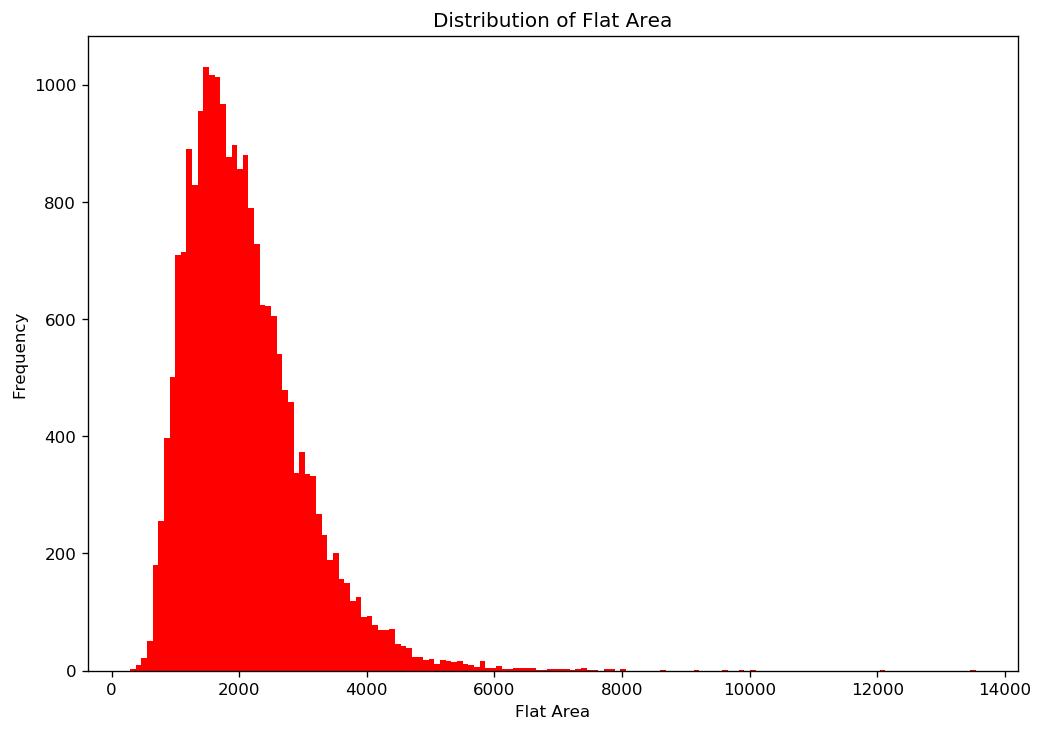

In [28]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data["Flat Area (in Sqft)"],bins=150,color="red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Flat Area")
plt.show()

In [29]:
#log transformation
def log_transform(sample_data):
    return numpy.log(sample_data)
data["Transform Flat Area"]=data["Flat Area (in Sqft)"].map(log_transform)

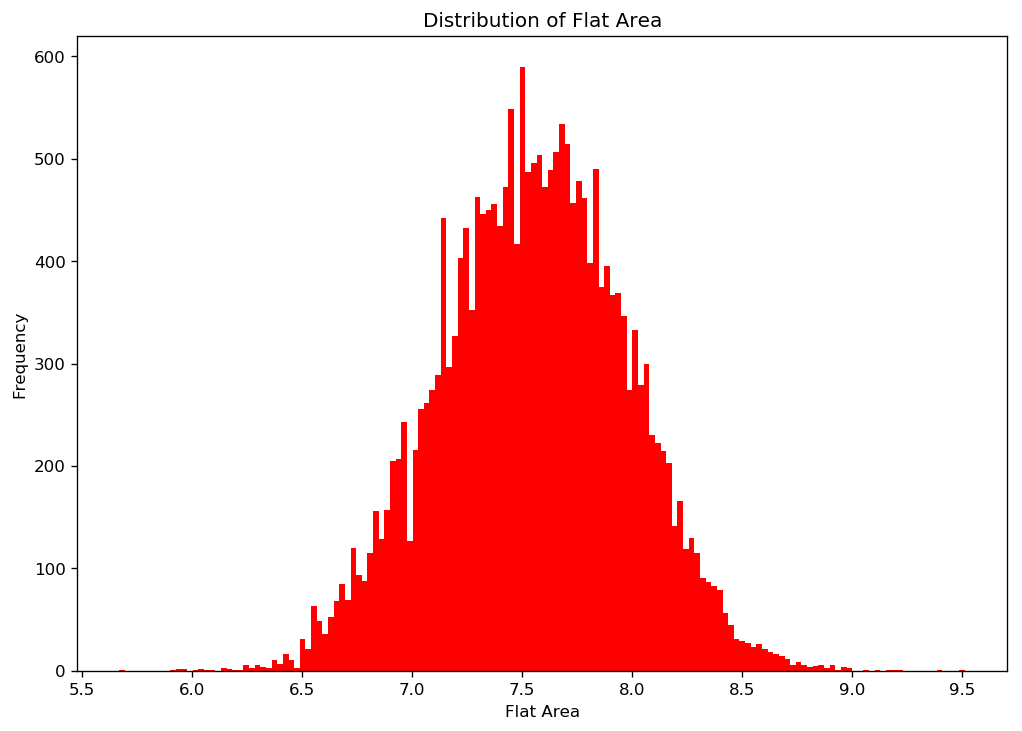

In [30]:
plt.figure(figsize=(10,7),dpi=120)
plt.hist(data["Transform Flat Area"],bins=150,color="red")
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Flat Area")
plt.show()

# Feature Transformation(Category Encoding)

In [31]:
#label encoding
label_encoded=data["Condition of the House"]
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [32]:
label_encoded=label_encoded.map({"Bad":1,
                                "Okay":2,
                                "Fair":3,
                                "Good":4,
                                "Excellent":5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Feature Transformation(Binning)

In [33]:
#Sparse Categories
data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [34]:
data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [35]:
mean=[]
for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"]==i].mean())

Text(0, 0.5, 'mean sale Price')

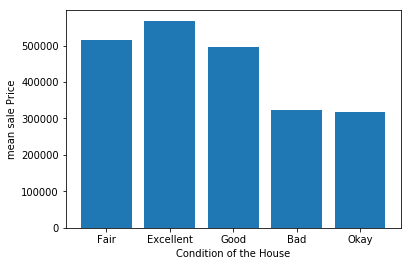

In [36]:
plt.bar(data["Condition of the House"].unique(),mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale Price")#redundancy occure in the below

In [37]:
mapping={"Excellent":"Excellent","Fair":"Good","Good":"Good","Okay":"Okay","Bad":"Okay"}
data["Condition of the House"]=data["Condition of the House"].map(mapping)


In [39]:
mean=[]
for i in data["Condition of the House"].unique():
    mean.append(data["Sale Price"][data["Condition of the House"]==i].mean())

Text(0, 0.5, 'mean sale Price')

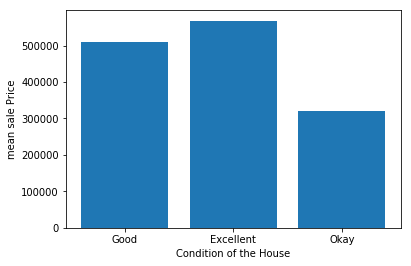

In [41]:
plt.bar(data["Condition of the House"].unique(),mean)
plt.xlabel("Condition of the House")
plt.ylabel("mean sale Price")

In [42]:
#continuous variable
len(data["Age of House (in Years)"].unique())

116

In [43]:
data["Age of House (in Years)"].max()

118

In [44]:
data["Age of House (in Years)"].min()

3

In [47]:
def age(x):
    if x<10:
        x="new"
    elif x<50:
        x="old"
    else:
        x="very old"
    return x

In [48]:
house_age=data["Age of House (in Years)"].map(age)
house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# Feature generation(Extraction)

In [49]:
data["Date House was Sold"].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [52]:
time=pandas.DatetimeIndex(data["Date House was Sold"])
data["year_sold"]=time.year
data["month_sold"]=time.month
data["weekday_sold"]=time.weekday_name
data["date_sold"]=time.days_in_month
data[["year_sold","month_sold","weekday_sold","date_sold"]].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29


# Feature generation(Combination)

In [54]:
import pandas
rhd=pandas.read_csv("1. Regression - Module - (Housing Prices).csv")
rhd

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14 May 2017,1230000.0,4,4.50,5420.0,101930.0,1.0,No,None,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,None,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,None,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,None,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,None,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


In [58]:
def luxury(x):
    count=0
    if x[0]=="Yes":
        count=count+1
    if x[1] in["Excellent","Good"]:
        count=count+1
    if x[2]>=8:
        count=count+1
    if count>=2:
        return"Yes"
    else:
        return"no"
data["luxury"]=data[["Waterfront View","Condition of the House","Overall Grade"]].apply(luxury,axis=1) 
data["luxury"].unique()

array(['no', 'Yes'], dtype=object)

In [59]:
luxury=data.pivot_table(values="Sale Price",columns="luxury",aggfunc="mean")
luxury

luxury,Yes,no
Sale Price,655067.166021,380385.64475


Text(0, 0.5, 'mean sale price')

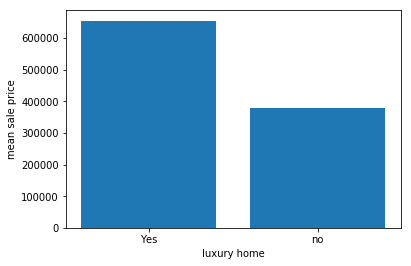

In [60]:
plt.bar(luxury.columns,luxury.iloc[0])
plt.xlabel("luxury home")
plt.ylabel("mean sale price")